<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch10_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10장 시각화

## 10.1 시각화를 시작하며 - 맷폴립과 시본 개요

맷플롯립(Matplotlib)
- 시각화를 위해 가장 많이 쓰임
- 직관적이지 못한 개발 API로 인해 코딩에 익숙해지는 데 많은 시간 필요
- 차트의 축 이름, 차트 테이블, 범례(legend) 등의 부가적인 속성까지 코딩 해야 함
- 기본 설정 환경에서는 현대적인 감각이 떨어지는 시각화 플롯

시본(Seaborn)
- 맷플롯립보다 쉬운 구현, 수려한 시각화, 편리한 판다스(Pandas)와의 연동
- 맷플롯립 기반
- 맷플롯립보다 상대적으로 적은 양의 코딩으로 보다 수렿나 시각화 플롯 제공
- 판다스의 칼럼명 기반으로 자동으로 축 이름 설정하는 등 편리한 연동 기능
- 특정 요소 경우 맷플롯립 함수 그대로 사용하기에 시본을 잘 활용하려면 반드시 맷플롯립을 어느 정도는 알고 있어야 함

## 10.2 맷플롯립(Matplotlib)

### 맷플롯립의 pyplot 모듈의 이해

맷플롯립은 파이썬 시각화를 위한 기반 모듈인 pyplot을 제공하며 이를 통해 시각화 구현 가능

`matplotlib.plot` 모듈을 관용적으로 `plt`라는 이름으로 import한 후 간단한 직선 그래프 그리기 예제

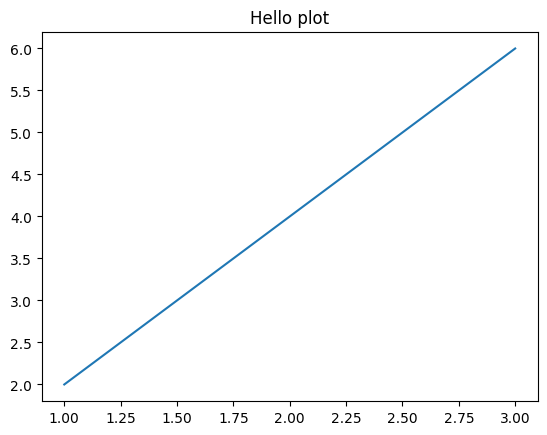

In [ ]:
# pyplot 모듈을 (관용적으로) plt라는 이름으로 import합니다.
import matplotlib.pyplot as plt

# plot() 함수로 선 그래프 그리기
# x좌표 입력값 [1, 2, 3], y좌표 입력값 [2, 4, 6]으로 선 그래프를 그립니다.
plt.plot([1, 2, 3], [2, 4, 6])

# 선그래프 타이틀을 Hello plot으로 설정.
plt.title("Hello plot")

# 선 그래프를 출력
plt.show()

### pyplot의 두 가지 중요 요소 - Figure와 Axes  이해

Figure 객체
- 그림을 그리기 위한 캔버스의 역할
- 그림판의 크기 조절
- 플롯을 최종적으로 화면에 나타내는 역할 수행
- 실제적으로 그림을 그리는 역할은 수행하지 않음

Axes 객체
- 실제 그림을 그리는 메서드를 가짐
- 대부분의 시각화를 수행하는 메서드들은 Axes에서 호출됨
- X축, Y축, 타이틀, 범례 등의 속성 설정에도 이용됨

앞의 간단한 직선 그래프 그리는 예제
```
plt.plot([1, 2, 3], [2, 4, 6])
# 기본으로 설정된 Axes에서 Axes.plot() 함수를 호출하여 그림을 그린다.
# Axes.plot()은 다시 Line2D 객체를 호출하여 선 그래프를 그린다.

plt.title("Hello plot")
# plt.title()은 내부적으로 다시 Axes.set_title() 함수를 호출하여 타이틀을 설정한다.
```

Figure와 Axis의 활용

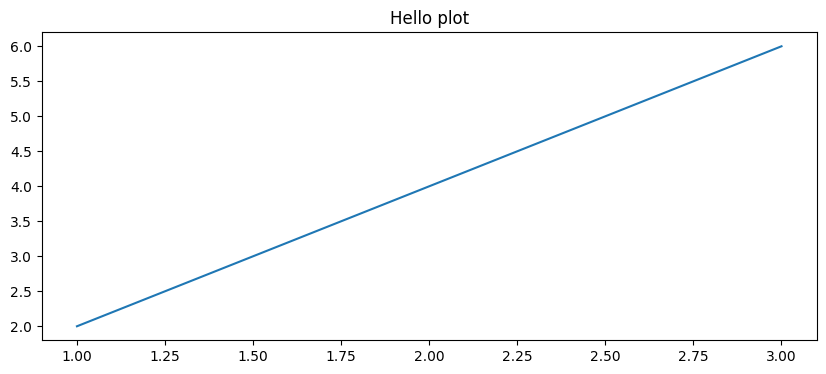

In [ ]:
# plt.figure()는 주로 figure의 크기를 조절하는 데 사용됨.
# plt 모듈의 figure() 함수 호출하면 Figure 객체가 반환됨.
# 인자로 figsize=(가로크기, 세로크기) 입력하면 해당 크기를 가지는 Figure 객체 반환
plt.figure(figsize=(10, 4))

plt.plot([1, 2, 3], [2, 4, 6])
plt.title("Hello plot")
plt.show()

In [ ]:
# plt의 figure() 함수가 Figure 객체를 반환함을 확인
figure = plt.figure(figsize=(10, 4))
print(type(figure))

<class 'matplotlib.figure.Figure'>


<Figure size 1000x400 with 0 Axes>

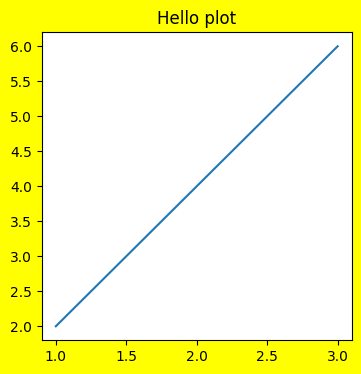

In [ ]:
# figrue() 함수의 인자로 facecolor='yellow'를 통해 그림판의 배경색을 노란색으로 변경
plt.figure(figsize=(4, 4), facecolor='yellow')
plt.plot([1, 2, 3], [2, 4, 6])
plt.title("Hello plot")
plt.show()

<class 'matplotlib.axes._axes.Axes'>


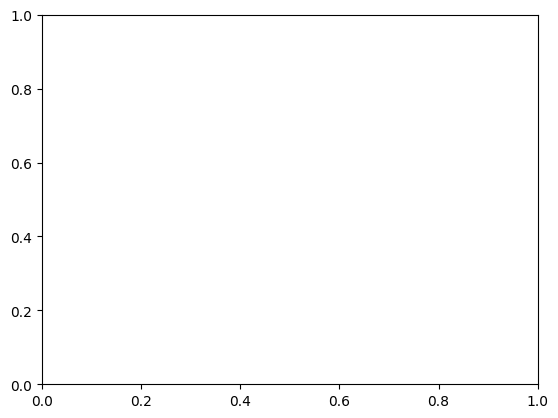

In [ ]:
# plt의 axes() 함수는 현재 사용하는 Axes 객체를 반환
ax = plt.axes()
print(type(ax))

fig type: <class 'matplotlib.figure.Figure'> 
ax type: <class 'matplotlib.axes._axes.Axes'>


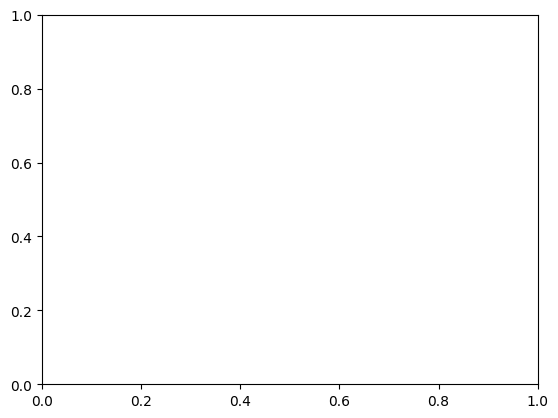

In [ ]:
# pyplot에서 설정된 Figure와 Axes 객체를 함께 가져오기
# plt의 subplots() 함수는 인자로 여러 개의 Axes를 설정할 수 있지만, 여기서는 디폴트 인자만 적용해 단 한 개의 Axes만 가져옴
fig, ax = plt.subplots()
print('fig type:', type(fig), '\nax type:', type(ax))

pyplot 모듈의 plot()이나 title()이 아닌 Axes 객체를 바로 이용해서 선 그래프 그리기

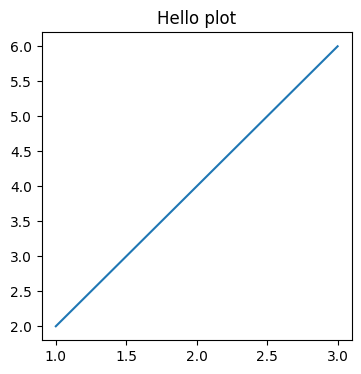

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
# Axes 객체의 plot()을 이용하여 선 그래프를 그림.
ax.plot([1, 2, 3], [2, 4, 6])

# Axes 객체의 set_title( )을 이용하여 선 그래프 타이틀을 Hello plot으로 설정.
ax.set_title('Hello plot')
plt.show()

### 여러 개의 plot을 가지는 subplot들을 생성하기

`plt.subplots()` 함수
- 주로 여러 개의 subplot을 생성하는 데 활용
- 하나의 Figure 상에서 여러 개의 그래프를 그릴 수 있게 하는데, 이때 개별 subplot은 하나의 Axes를 가짐
- 주요 인자: nrows, ncols, figsize
- `nrows`: 전체 subplot들의 배치를 2차원 형태로 표현할 때 행의 개수
- `ncols`: 열의 개수
- `figsize`: 모든 subplot들을 포함한 전체 Figure의 크기

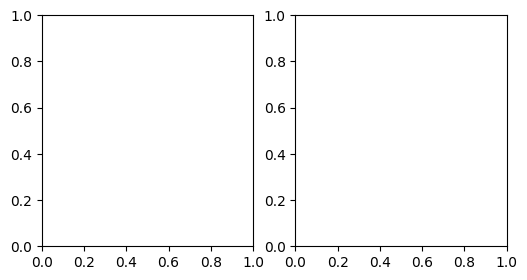

In [ ]:
# 아래는 두개의 subplot, 즉 두개의 Axes를 생성하되 열 방향으로 두개를 배치함.
# 또한 전체 크기가 가로 6, 세로 3인 Figure 생성.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반환되는 Axes 객체는 (ax1, ax2)와 같이 튜플 형태로 반환
# ax1이 첫번째 Axes, ax2가 두번째 Axes

### pyplot의 plot() 함수를 이용해 선 그래프 그리기

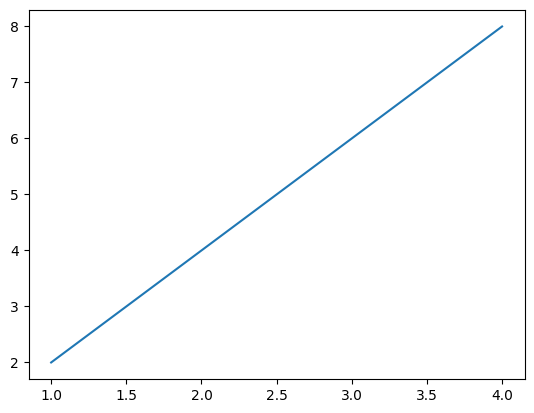

In [ ]:
import numpy as np
import pandas as pd

x_value = [1, 2, 3, 4]
y_value = [2, 4, 6, 8]
#x_value = np.array([1, 2, 3, 4])
#y_value = np.array([2, 4, 6, 8])

# 입력값으로 파이썬 리스트, numpy의 array, Pandas의 DataFrame/Series 모두 적용 가능
# x 좌표값과 y좌표값은 모두 같은 크기를 가져야 함.

plt.plot(x_value, y_value)
plt.show()

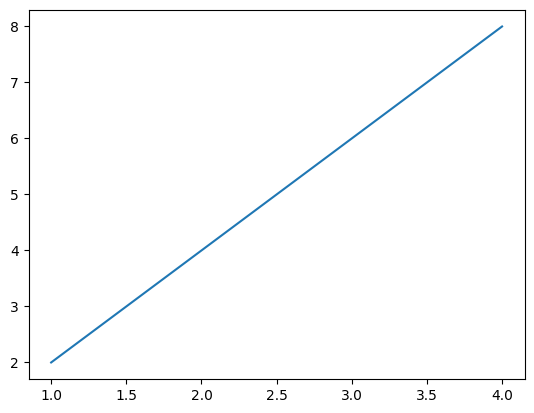

In [ ]:
import pandas as pd

df = pd.DataFrame({'x_value':[1, 2, 3, 4],
                   'y_value':[2, 4, 6, 8]})

# 입력값으로 pandas Series 및 DataFrame도 가능.
plt.plot(df['x_value'], df['y_value'])

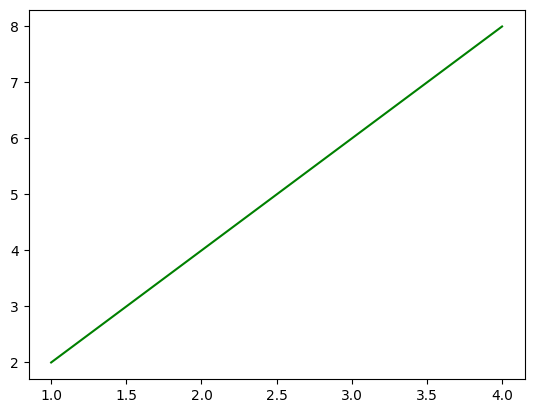

In [ ]:
# color인자를 green으로 설정하여 선의 색깔을 녹색으로 변경.
plt.plot(x_value, y_value, color='green')

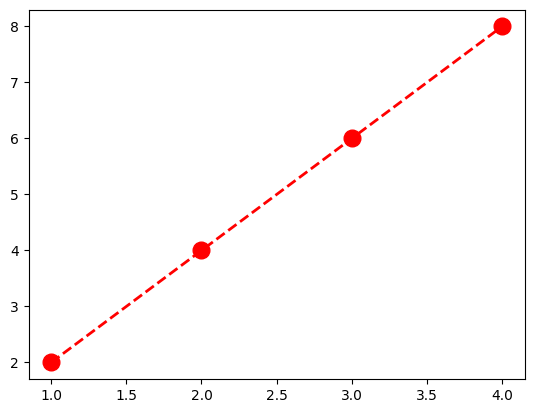

In [ ]:
# API 기반으로 시각화를 구현할 때는 함수의 인자들에 대해서 알고 있어야 하는 부작용(?)이 있음.
plt.plot(x_value, y_value, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
# 선의 색: 빨간 색, 좌표점 마커: 동그라미, 선의 형태: 대시형, 선의 두께: 2, 마커 크기: 12

### 축 명칭 설정, 축의 눈금(틱)값 회전, 범례(legend) 설정하기

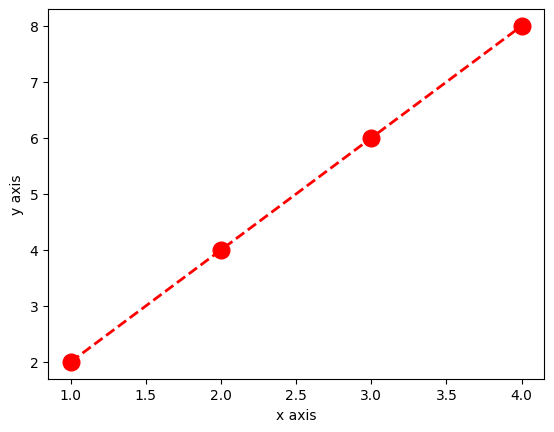

In [ ]:
plt.plot(x_value, y_value, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)

# x축과 y축의 이름을 텍스트로 할당하여 설정합니다.
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

축의 눈금값(틱값) 회전. x축값이 문자열이고 많은 tick값이 있을 때 눈금 간에 값이 중복되면서 제대로 보이지 않기 때문에 적용.

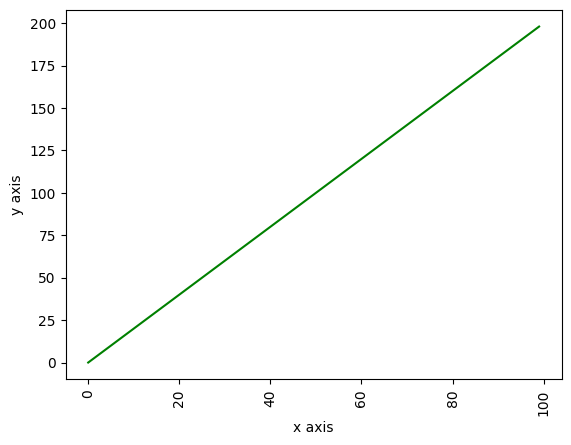

In [ ]:
# x 좌표 값을 0 ~ 99까지 100개로 설정.
x_value = np.arange(0, 100)
# y 좌표 값은 개별 x좌표값을 2배로 해서 100개로 설정.
y_value = 2*x_value

plt.plot(x_value, y_value, color='green')
plt.xlabel('x axis')
plt.ylabel('y axis')

# x축 눈금값을 90도로 회전
plt.xticks(rotation=90)

plt.show()

- 축 값이 문자열인 경우 모든 값을 나타내 주지만, 숫자값이면 자동으로 최솟값과 최댓값에 기반해 축의 크기에 따라 눈금 간격을 만들어 줌

X축의 눈금 값 더 세밀하게 나타내고 싶으면 `xticks()` 함수의 인자로 ticks 값을 설정

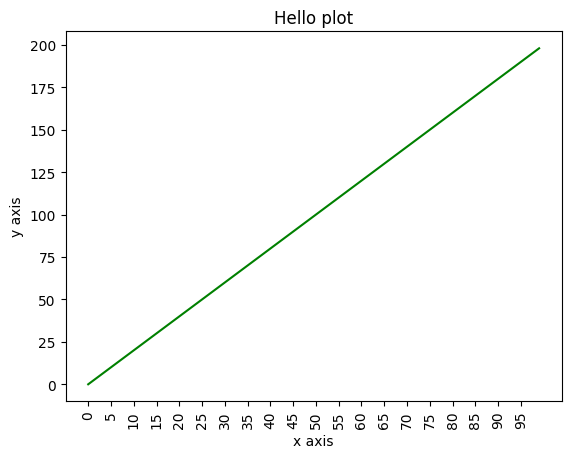

In [ ]:
x_value = np.arange(0, 100)
y_value = 2*x_value

plt.plot(x_value, y_value, color='green')
plt.xlabel('x axis')
plt.ylabel('y axis')

# X축의 눈금값을 np.arange(0, 100, 5)로 하여 0 부터 99까지 5 스텝으로 20개를 표시하고 90도 회전
plt.xticks(ticks=np.arange(0, 100, 5), rotation=90)

plt.title('Hello plot')
plt.show()

범례 설정하기

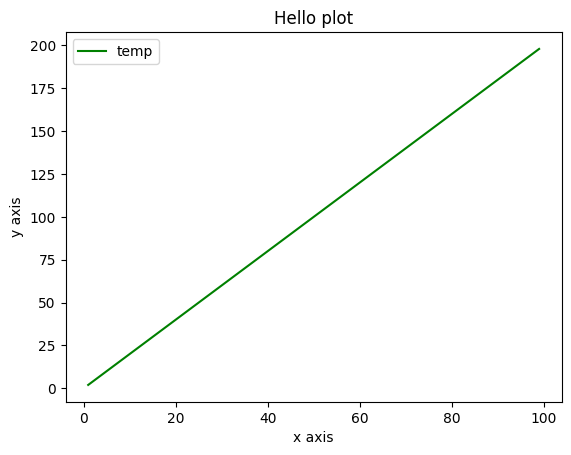

In [ ]:
x_value = np.arange(1, 100)
y_value = 2*x_value

plt.plot(x_value, y_value, color='green', label='temp')
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.legend()

plt.title('Hello plot')

plt.show()

범례를 설정하고 matplotlib을 여러개의 plot을 하나의 Axes내에서 시각화

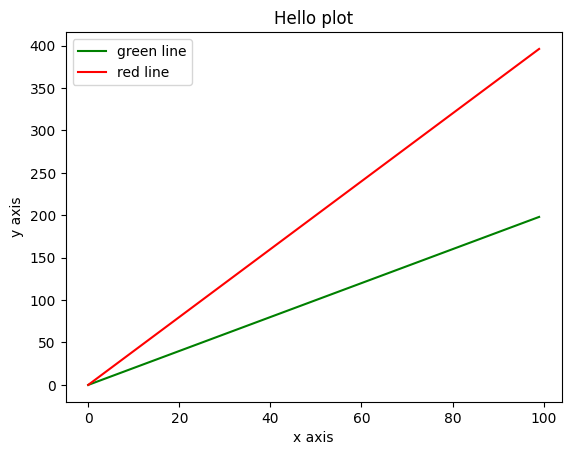

In [ ]:
# X좌표값은 0 ~ 99까지 100개, 첫번째 Y좌표값은 X좌표값의 두배, 두번째 좌표값은 X좌표값의 4배
x_value_01 = np.arange(0, 100)
y_value_01 = 2*x_value_01
y_value_02 = 4*x_value_01

# X좌표값과 첫번째 Y좌표값으로 녹색의 선그래프를 그림. label을 'green line'으로 설정.
plt.plot(x_value_01, y_value_01, color='green', label='green line')
# X좌표값과 두번째 Y좌표값으로 빨간색 선그래프를 그림. label을 'red line'으로 설정.
plt.plot(x_value_01, y_value_02, color='red', label='red line')

plt.xlabel('x axis')
plt.ylabel('y axis')
# 개별 plot들의 label로 설정된 문자열을 범례로 표시
plt.legend()

plt.title('Hello plot')

plt.show()

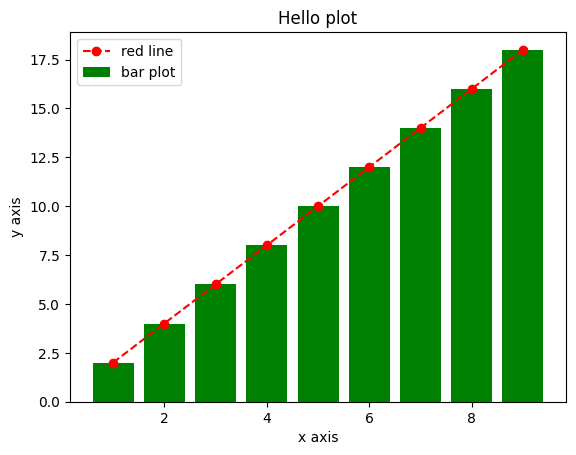

In [ ]:
x_value_01 = np.arange(1, 10)
y_value_01 = 2*x_value_01

# 마커를 포함한 빨간선 대쉬 선 그래프를 그리고, label은 'red line'으로 설정
plt.plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', label='red line')
# X값에 따른 Y값을 나타내는 초록색 막대 그래프를 그리고 label은 'bar plot'으로 설정
plt.bar(x_value_01, y_value_01, color='green', label='bar plot')
plt.xlabel('x axis')
plt.ylabel('y axis')
# 두개의 그래프에서 label설정된 문자열 값을 범례로 표시
plt.legend()

plt.title('Hello plot')

plt.show()

위 예제와 동일한 시각화 결과를 출력하되, 직접 Axes 객체 메서드를 사용해 시각화 수행

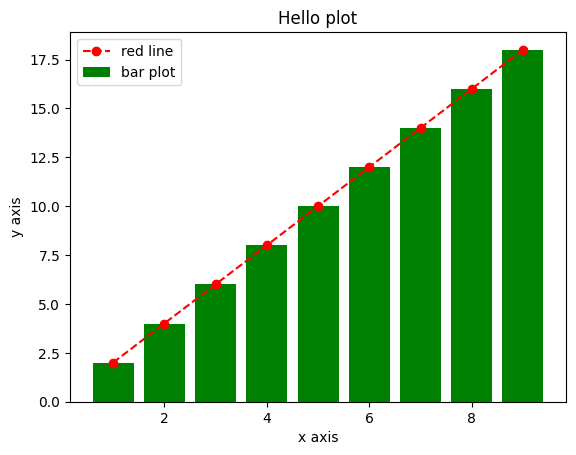

In [ ]:
figure = plt.figure()

# Axes 객체를 추출하여 ax변수에 할당.
ax = plt.axes()

# plt.plot( )은 ax.plot( )으로 plt.bar( )는 ax.bar( )로 변경.
ax.plot(x_value_01, y_value_01, color='red',  marker='o', linestyle='dashed', label='red line')
ax.bar(x_value_01, y_value_01, color='green', label='bar plot')

# plt.xlabel( )은 ax.set_xlabel( )로, plt.ylabel( )은 ax.set_ylabel( )로 변경
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

# ax.set_legend()가 아니라 ax.legend()임.
ax.legend()
# plt.title( )을 plt.set_title( )로 변경
ax.set_title('Hello plot')

plt.show()

### 여러개의 subplots들을 이용해 개별 그래프들을 subplot별로 시각화하기

* nrows가 1일 때는 튜플로 axes를 받을 수 있음.
* nrows나 ncols가 1일때는 1차원 배열형태로, nrows와 ncols가 1보다 클때는 2차원 배열형태로 axes를 추출

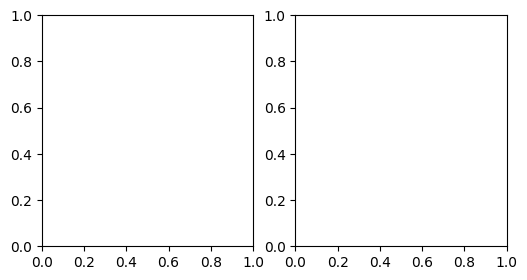

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

- 반환된 Axes 객체들을 가지는 ax 변수는 튜플이 아니라 넘파이 ndarray 형태
- 각각 개별 원소인 ax[0]은 왼쪽에 생성된 Axes 객체를, ax[1]은 오른쪽에 생성된 Axes 객체를 가리킴

In [ ]:
print('ax type:', type(ax))
print('ax[0] type:', type(ax[0]))
print('ax[1] type:', type(ax[1]))

ax type: <class 'numpy.ndarray'>
ax[0] type: <class 'matplotlib.axes._axes.Axes'>
ax[1] type: <class 'matplotlib.axes._axes.Axes'>


유의 사항: 개별 Axes 객체를 직접 이용해서 시각화를 구현해야 함

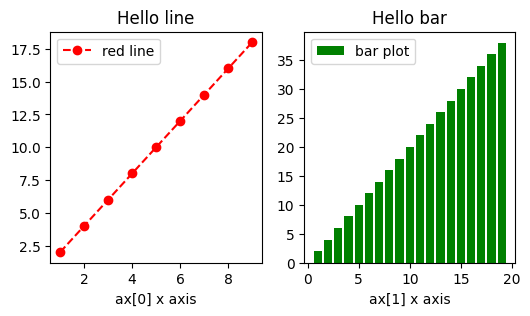

In [ ]:
import numpy as np

x_value_01 = np.arange(1, 10)
x_value_02 = np.arange(1, 20)
y_value_01 = 2 * x_value_01
y_value_02 = 2 * x_value_02

# figsize는 (6,3)인 Figure와 2개의 Axes를 가지는 subplots을 반환.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 개별 Axes객체들을 각각 이용하여 선 그래프와 막대그래프를 그림.
ax[0].plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', label='red line')
ax[1].bar(x_value_02, y_value_02, color='green', label='bar plot')

# 개별 Axes객체 각각에 X축명을 설정.
ax[0].set_xlabel('ax[0] x axis')
ax[1].set_xlabel('ax[1] x axis')

# 개별 Axes객체 각각에 범례를 설정
ax[0].legend()
ax[1].legend()

# 개별 Axes객체 각각에 타이틀을 설정
ax[0].set_title('Hello line')
ax[1].set_title('Hello bar')

plt.show()

nrows가 1이거나 ncols가 1인 경우 1차원 배열 인덱싱 방식으로 Axes 접근 가능
- 예) axx[0], ax[1], ax[2]로 3개의 Axes 객체 접근

nrows가 2 이상이고, ncols도 2 이상이면 1차원 배열 인덱싱 방식이 아닌 2차원 배열 인덱싱 방식으로 접근해야 함

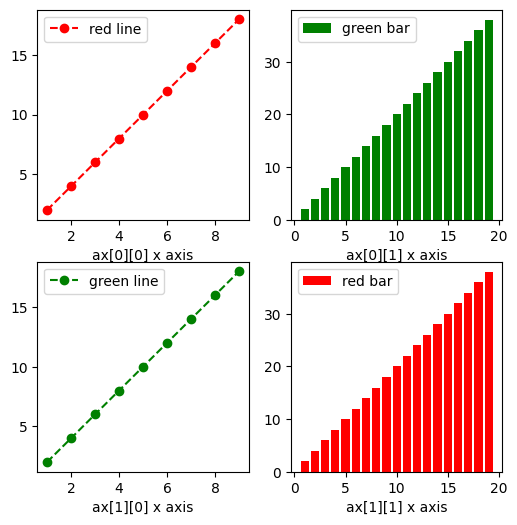

In [ ]:
import numpy as np

x_value_01 = np.arange(1, 10)
x_value_02 = np.arange(1, 20)
y_value_01 = 2 * x_value_01
y_value_02 = 2 * x_value_02

# figsize는 (6,6)인 Figure와 2x2개의 Axes를 가지는 subplots을 반환.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# 2x2 Axes객체들을 각각 이용하여 선 그래프와 막대그래프를 그림.
ax[0][0].plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', label='red line')
ax[0][1].bar(x_value_02, y_value_02, color='green', label='green bar')
ax[1][0].plot(x_value_01, y_value_01, color='green', marker='o', linestyle='dashed', label='green line')
ax[1][1].bar(x_value_02, y_value_02, color='red', label='red bar')

# 개별 Axes객체 각각에 X축명을 설정.
ax[0][0].set_xlabel('ax[0][0] x axis')
ax[0][1].set_xlabel('ax[0][1] x axis')
ax[1][0].set_xlabel('ax[1][0] x axis')
ax[1][1].set_xlabel('ax[1][1] x axis')

# 개별 Axes객체 각각에 범례를 설정
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.show()

## 10.3 시본(Seaborn)

### 시각화를 위한 차트/그래프 유형

비즈니스 분석을 위한 시각화
- 청중의 유형, 수준, 설득이 필요한 다양한 환경에 따라서 적절하게 여러 가지 차트를 활용

통계 분석을 위한 시각화
- 데이터 자체가 가지는 통계적인 특성을 설명하기 위해 시각화 동원

### 정보의 종류에 따른 시각화 차트 유형

- 히스토그램: 연속형 값에 대한 도수 분포 나타냄. X축 값은 도수 분포를 원하는 연속형 값의 구간, Y축 값은 해당 구간의 도수 분포(건수)를 나타냄.
- 바 플롯: 특정 칼러의 이산 값에 따른 다른 칼럼의 연속형 값(평균, 총합 등)을 막대 그래프로 시각화.
- 박스 플롯: 연속형 값의 사분위 IQR와 최대, 최소, 이상치 값을 시각화.
- 바이올린 플롯: 히스토그램의 연속 확률 분포 곡선과 박스 플롯을 바이올린 형태로 함께 시각화.
- 스캐터 플롯: 산점도로 불리며 2개의 연속형 값들을 X, Y 좌표상의 점으로 시각화하여 해당 값들이 어떻게 관계되어 있는지 나타냄.
- 상관 히트맵: 다수의 연속형 칼럼들에 대해서 상호 간의 상관 관계를 시각화.


### 히스토그램(Histogram)

타이타닉 데이터세트 로딩하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

titanic_df = pd.read_csv('/content/drive/MyDrive/데이터/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 연속값에 대한 구간별 도수 분포를 시각화

seaborn histogram
* seaborn의 예전 histogram은 distplot함수지만 deprecate됨.
* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임.

`histplot()` 함수로 타이타닉 승객의 나이를 히스토그램으로 시각화

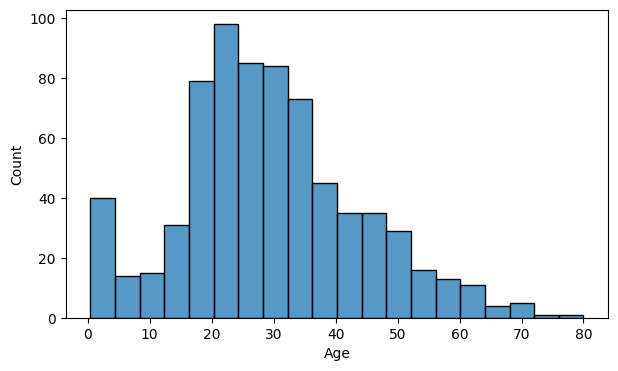

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(7, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당.
sns.histplot(titanic_df['Age'], bins=20)
# 히스토그램 대상이 되는 Age 칼럼 데이터, 구간의 개수 bins=20
plt.show()

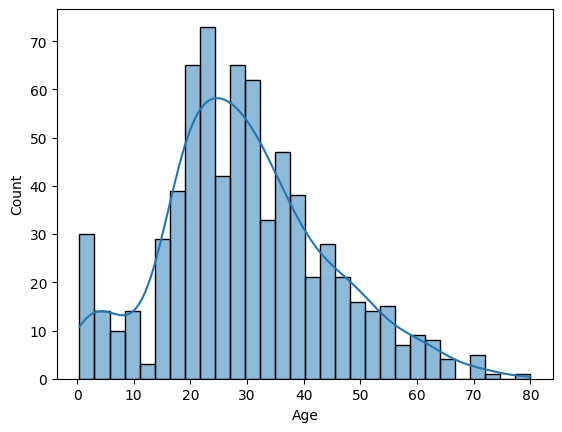

In [4]:
sns.histplot(x='Age', data=titanic_df, bins=30, kde=True)
# bins=30으로 구간 개수 늘리고, kde=True로 연속 확률분포 곡선까지 함께 시각화
plt.show()

`displot()` 함수로 타이타닉 승객의 나이를 히스토그램으로 시각화

<Figure size 800x400 with 0 Axes>

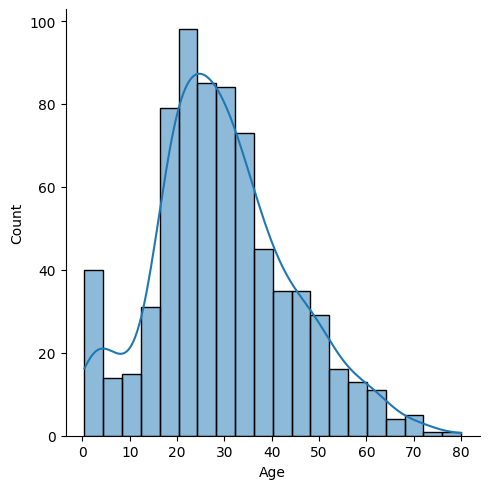

In [5]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure( )로 Figure 크기를 조절할 수 없습니다
plt.figure(figsize=(8, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당.
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

- `plt.figure(figsize=(8, 4))`로 가로가 세로의 2배 크기가 되도록 Figure 설정했지만, 오히려 세로가 더 긴 히스토그램으로 만들어짐
- 시본의 Figure 레벨 함수를 사용하면 `plt.figure()`를 이용하여 Figure의 크기를 조절할 수 없기 때문

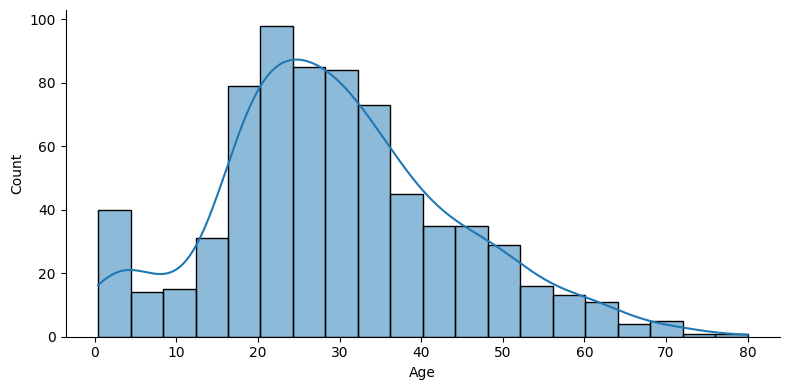

In [6]:
import seaborn as sns

sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
# displot() 함수의 Figure 크기 조절 위한 인자: height(세로), aspect(가로와 세로의 배율)
# 가로는 height*aspect를 적용하여 자동으로 결정됨 => 세로 4, 가로 4*2=8
plt.show()

### 카운트 플롯

- 이산형 값의 건수를 막대 그래프 형태로 시각화
- 주로 카테고리성 칼럼 값별 건수를 시각화
- 시본의 `countplot()` 사용

타이타닉 데이터의 Pclass(선실 등급) 값별 건수 시각화

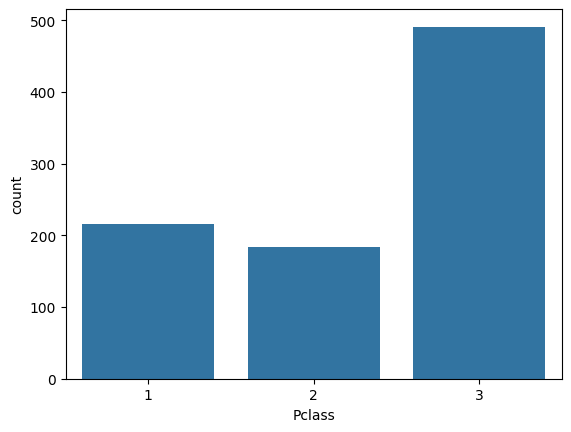

In [7]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

- 1(1등실): 200명 조금 넘는 사람
- 2(2등실): 200명 약간 안 되는 사람
- 3(3등실): 거의 500명에 가까운 사람이 탑승

### 바 플롯(barplot)

- seaborn의 barplot은 x축은 이산값(주로 category값), y축은 연속값(y값의 평균/총합)을 표현

타이타닉 데이터 세트의 Pclass 1, 2, 3 값별로 Age의 평균 값 표현

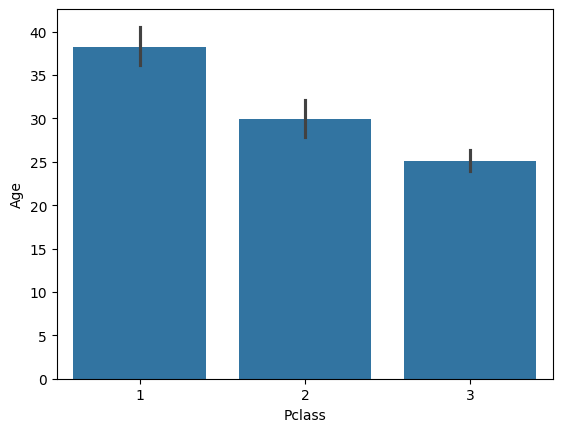

In [8]:
# 자동으로 xlabel, ylabel을 barplot( )의 x인자값인 Pclass, y인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

- 기본적으로 Y축 값의 평균 값 나타냄.
- `estimator` 인자값을 설정하여 변경 가능(총합, 중앙값 등)

타이타닉 데이터 세트의 Pclass 1, 2, 3 값별로 Survived의 평균 값 표현

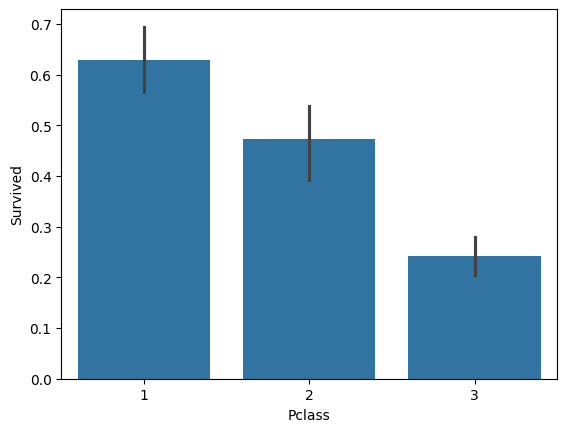

In [9]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()

- Survived 칼럼 값은 0과 1 두개의 값(0은 사망, 1은 생존)으로 구성됨
- Y축 값이 평균 생존율 나타내게 됨
- Y축은 연속형 값을 표현한다고 설명했는데 Survived 칼럼은 이산형 숫자값이지만 0과 1로 되어 있기에 평균값을 평균 비율로 나타낼 수 있음

y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환

[]

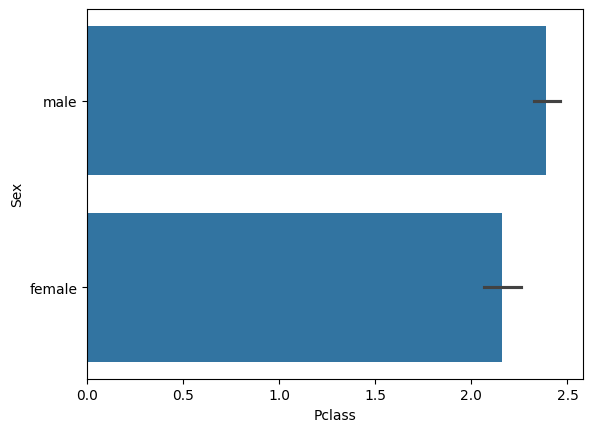

In [10]:
# y축 문자열 값인 'Sex'
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.plot()

Y축 표현값을 평균이 아니라 총합으로 나타낼 수 있음

<ipython-input-12-f04ab605102e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)


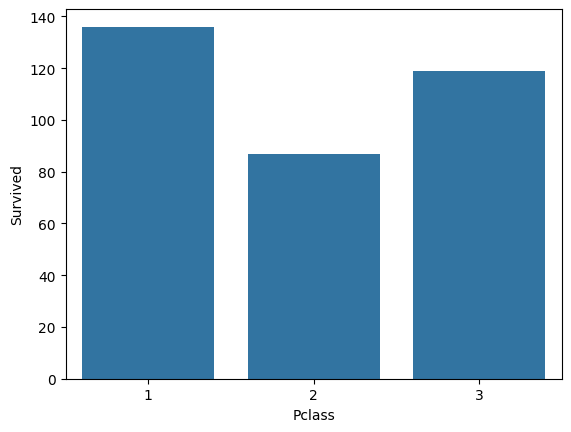

In [12]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)
plt.show()

### bar plot() 함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기

Pclass에 따른 성별(Sex)별 평균 나이 시각화

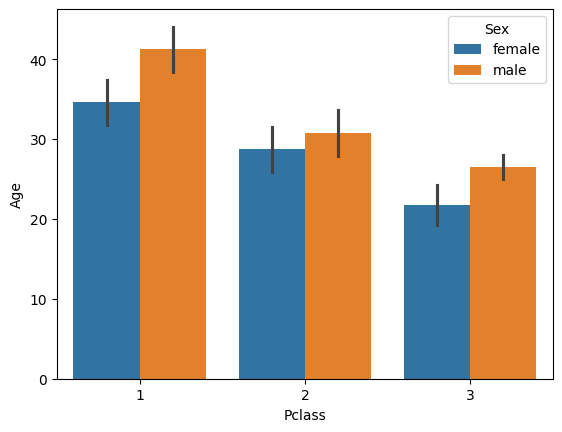

In [14]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

Pclass에 따른 성별(Sex)별 생존율

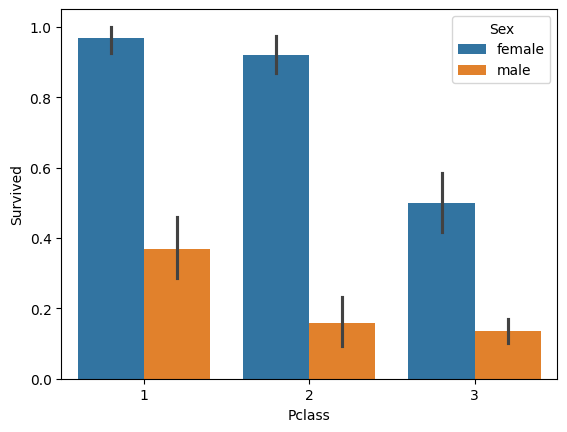

In [15]:
# 개별 Pclass 값 별로 Sex에 따른 Survived 평균 값을 구함.
# Pclass가 X축값이며 Survived가 Y축값. hue파라미터로 Sex를 설정
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

### 박스 플롯

* 4분위를 박스 형태로 표현
* x축값에 이산값을 부여하면 이산값에 따른 box plot을 시각화

y인자에 Age 칼럼 설정하여 Age 값의 분위수를 기반으로 한 수직 박스 플롯 시각화

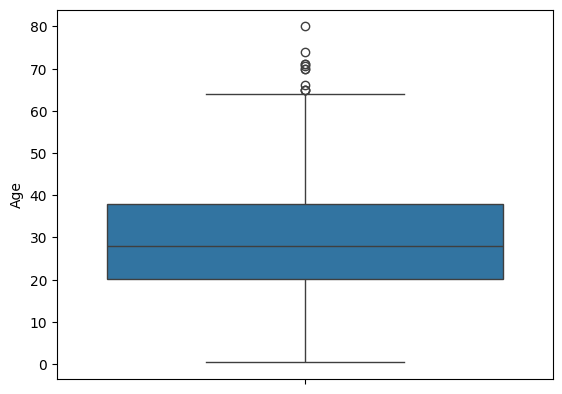

In [16]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

Pclass값별로 Age에 대한 수직 박스 플롯 시각화

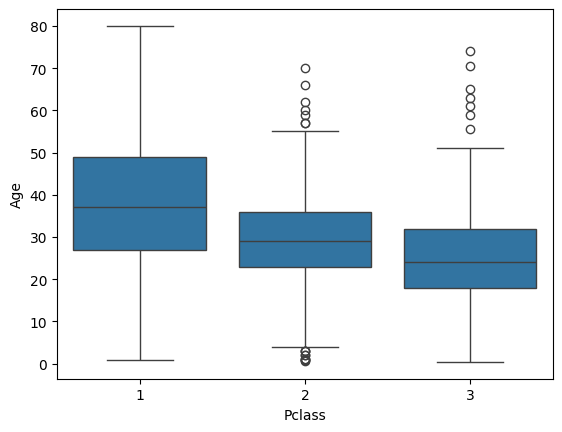

In [17]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

Pclass값별로 세부적인 Sex값인 성별에 따른 Age값의 박스 플롯 시각화

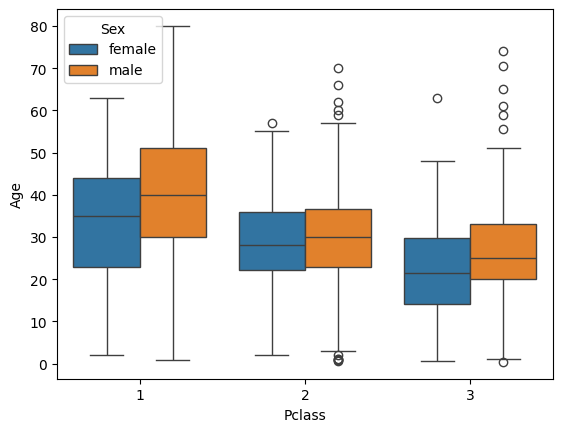

In [18]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### 바이올린 플롯

* 단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화. 또한 중심에는 4분위를 알수있음.
* 보통은 X축에 설정한 컬럼의 개별 이산값 별로 Y축 컬럼값의 분포도를 시각화하는 용도로 많이 사용

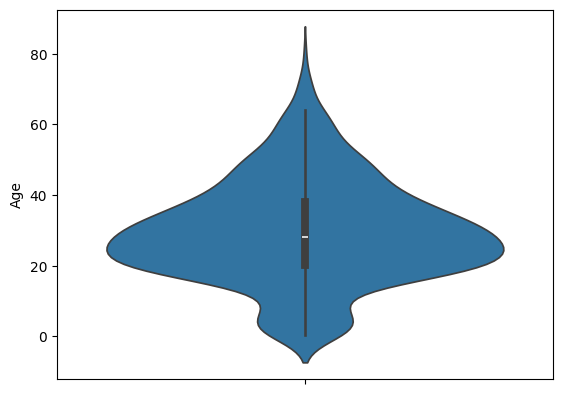

In [19]:
# Age 컬럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

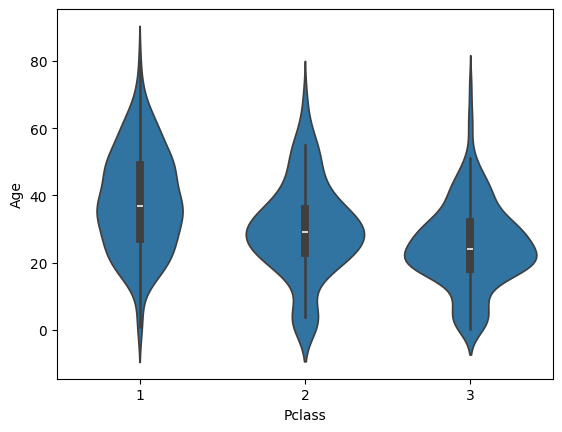

In [20]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# pClass값 별로 Age의 연속 확률분포 곡선과 박스플롯을 시각화하므로 pClass값별 Age 데이터 분포를 비교하여 볼수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

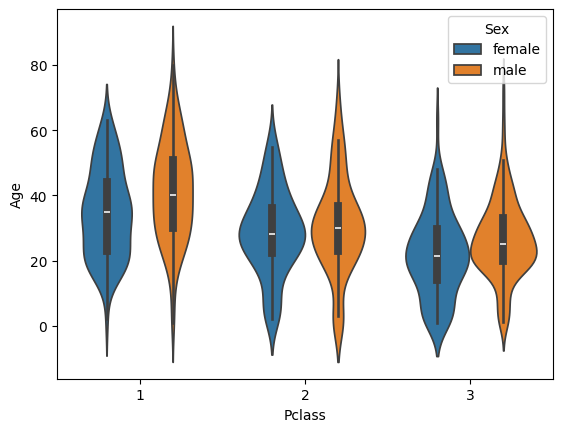

In [21]:
# x축값인 개별 Pclass내에서 Sex값 별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### subplots를 이용하여 시본의 다양한 그래프를 시각화

시본의 모든 Axes레벨 시각화 함수는 ax라는 인자를 가지고 있다. 시각화 함수 호출 시 이 ax 인자에 개별 Axes 객체를 할당하면 된다.

subplots을 이용하여 주요 이산형 컬럼의 건수(Survived, Pclass, SEx)를 시각화 하기

- 칼럼 3개이므로 세 개의 Axes 객체를 가지는 subplots 생성하고 개별 Axes 객체에 시본의 countplot 함수 적용

index: 0
index: 1
index: 2


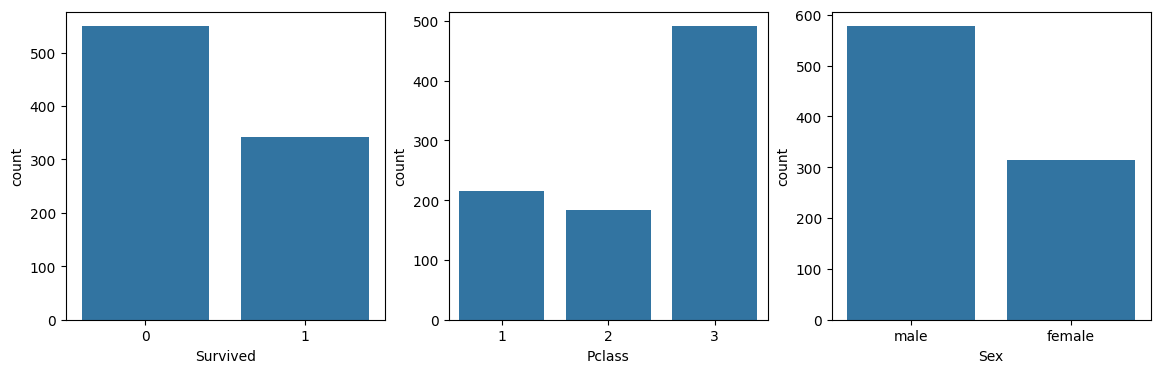

In [22]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

subplots을 이용하여 주요 이산형 컬럼(Pclass, Sex, Embarked)별로 생존율(Survived값의 평균값) 시각화 하기

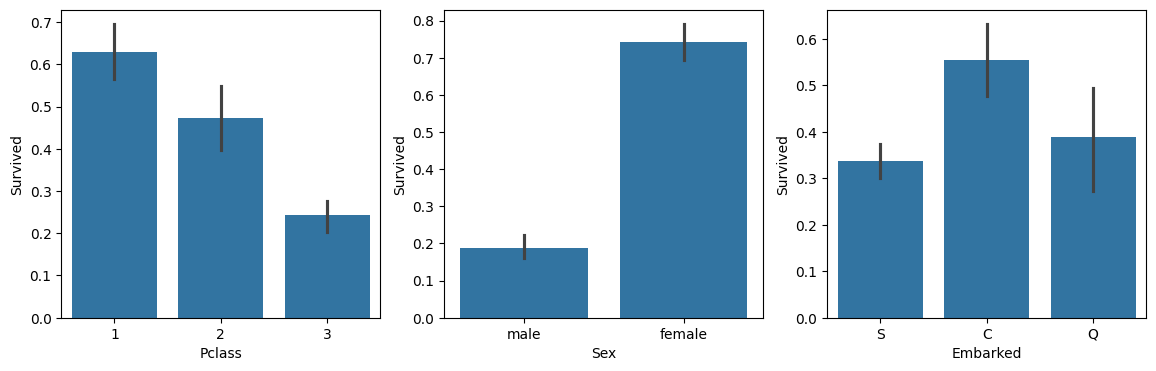

In [23]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

subplots를 이용하여 여러 연속형 컬럼값들의 Survived 값에 따른 연속 분포도를 시각화
* 왼쪽에는 Violin Plot으로
* 오른쪽에는 Survived가 0일때의 Histogram과 Survived가 1일때의 Histogram을 함께 표현

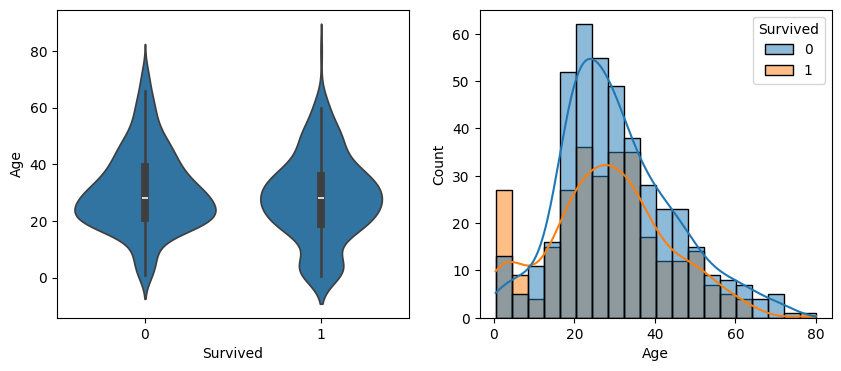

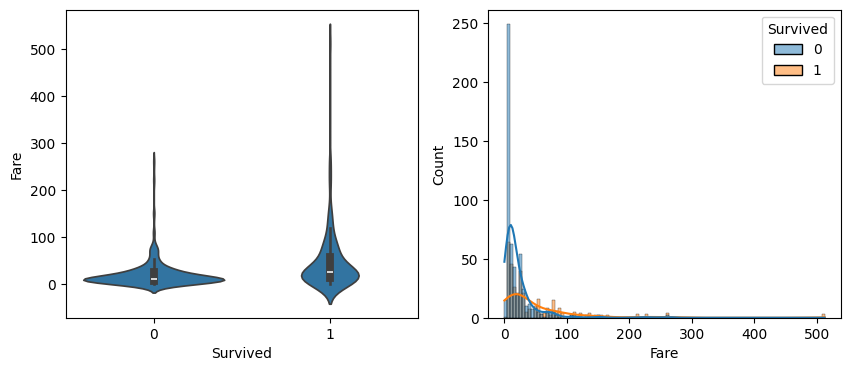

In [24]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 컬럼들의 개수만큼 루프 수행.
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화 하기 위해 nrows는 1, ncols=2인 서브플롯 생성.
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # 왼쪽 Axes객체에는 Survived값 0, 1별 개별 컬럼의 바이올린 플롯 시각화.
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])

    # 오른쪽 Axes객체에는 Survived 값에 따른 개별 컬럼의 히스토그램 시각화
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

### 산점도, 스캐터 플롯(Scatter Plot)

* 산포도로서 X와 Y축에 보통 연속형 값을 시각화. hue, style등을 통해 breakdown 정보를 표출할 수 있습니다.

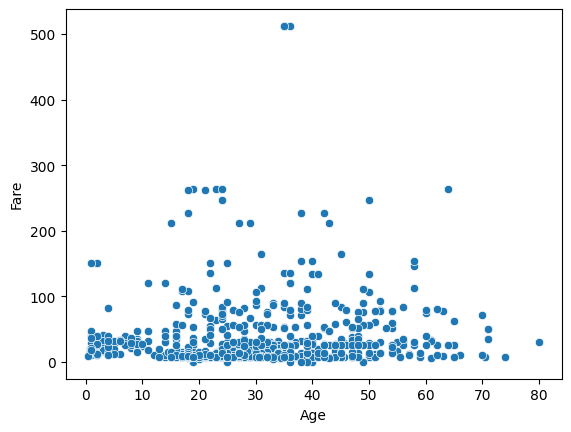

In [25]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

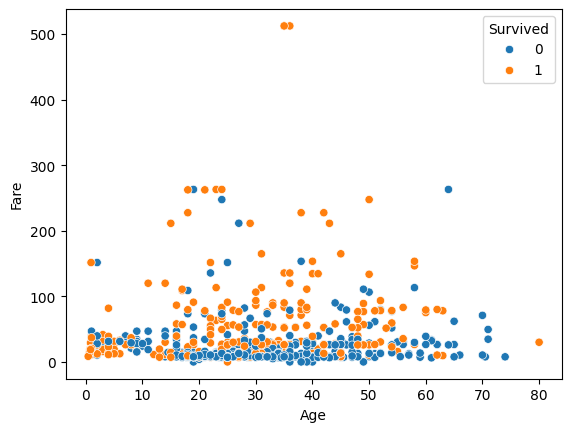

In [26]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

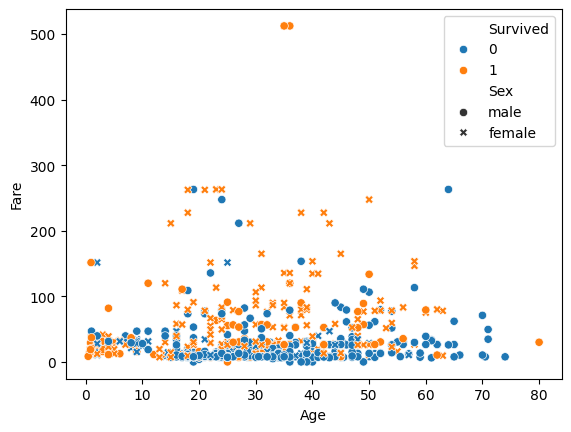

In [27]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

### 상관 히트맵(Correlation Heatmap)

* 컬럼간의 상관도를 Heatmap형태로 표현

In [29]:
# Select only numerical features for correlation calculation.
numerical_features = titanic_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features.
corr_df = numerical_features.corr()

# Display the correlation matrix.
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


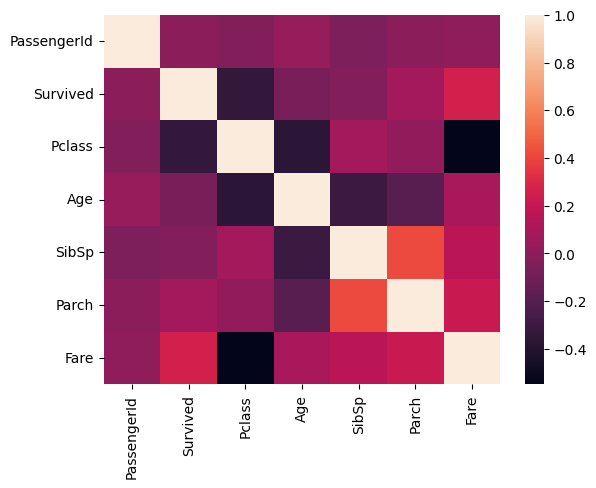

In [31]:
sns.heatmap(corr_df)
plt.show()

<Axes: >

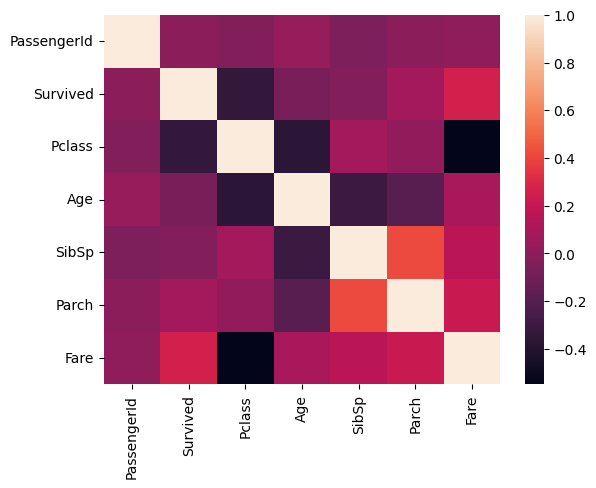

In [32]:
sns.heatmap(corr_df, cmap='rocket') # cmap 인자는 color map으로서 히트맵의 색상 변경

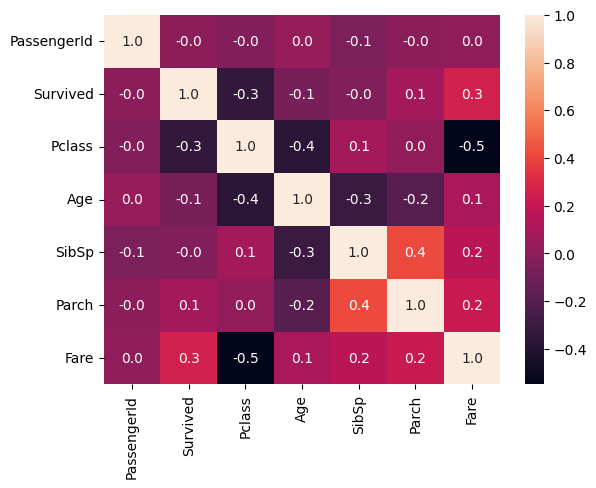

In [34]:
sns.heatmap(corr_df, annot=True, fmt='.1f', cbar=True)
# annot 인자 True: 숫자로 된 상관계숫값 표시(인자 생략하면 False)
# 개별 숫자값 길이 커지면 서로 겹쳐 보임 => fmt 인자로 숫자값의 포맷 변환
# fmt='.1f'로 설정하면 소수점 한 자리까지만 산광계숫값 표시
# cbr 인자 True: 숫자값에 따른 색깔 기준 막대로 표시(인자 생략하면 True)
plt.show()